## Python高级编程第三课-面向对象

In [ ]:
## 建造一台小汽车

create_cirlle(10cm)
create_plate(50, 70)
.. 
.. 
..
.. 
merge(circle, plate)

## Oriented Procedure

所有做的事情，按照时间顺序排个序，然后一步一步做

## 造一个轮子
    -> 如何造一个轮子
    —> 如何把轮子和底盘连起来
## 造一个底盘

## 造一个车门

轮子可以连接底盘
车盘可以连接底盘 # Object 



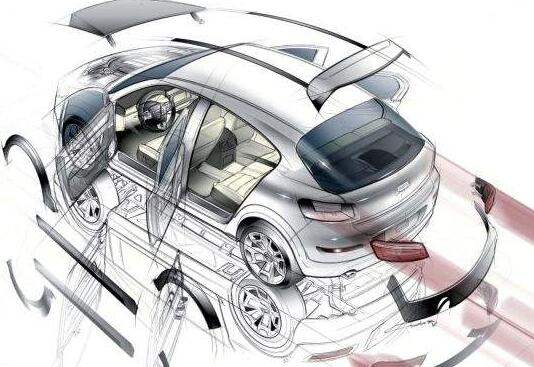

---

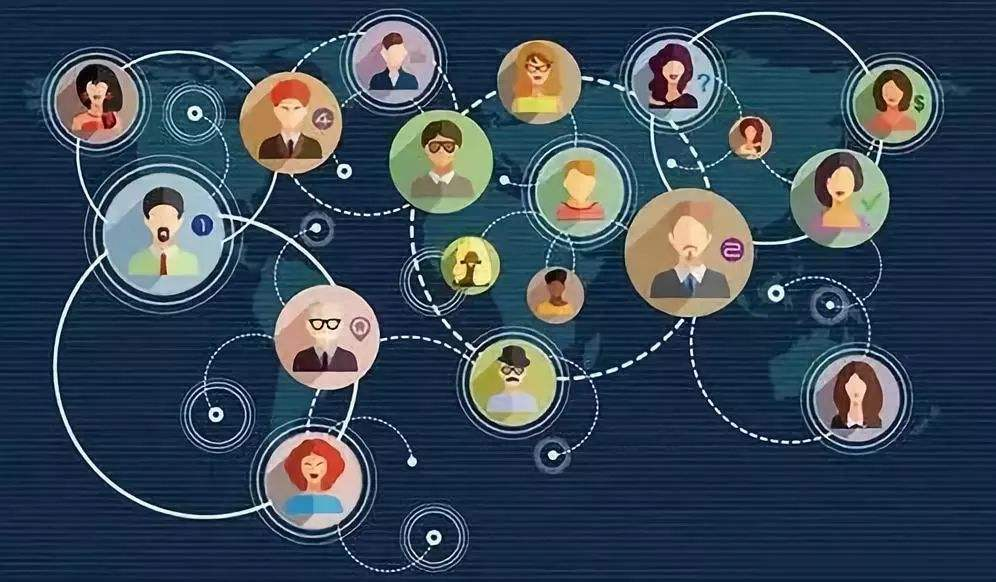

# Java / C++ : 
    
-> private, protected, public
    

## 私有属性和公有属性

```
Python没有像C++语言或者Java语言中private 和public的语法来声明私有属性和共有属性。

默认，在Class内部，可以有属性和方法，而外部代码可以通过直接调用实例变量的方法来操作数据，也就是默认的属性和方法都是共有的。

如果要让内部属性不被外部访问，可以把属性的名称前加上两个下划线__
```

In [58]:
class Student:
    name = ""
    __pid = ""
    def __init__(self, name, pid):
        self.name = name
        self.__pid = pid  # ==> Java: private
        # _pid => protected 
    
    def display(self):
        print(f"name: {self.name}\npid: {self.__pid}")
        
    def __reset_pid(self, pid):
        self.__pid = pid
        
    def empty_pid(self):
        self.__reset_pid("")

In [59]:
s = Student("Jam", '440128192XXXXX')
s.display()

name: Jam
pid: 440128192XXXXX


In [ ]:
s = Student("Jam", '440128192XXXXX')
s.display()
# 错误调用
s.__pid
s.__reset_pid()
# 正常调用
s.empty_pid()
s.display()

### 不能修改继承的私有属性


In [86]:
class Student:
    name = ""
    __pid = ""
    def __init__(self, name, pid):
        self.name = name
        self.__pid = pid
    def display(self):
        print(f"name: {self.name}\npid: {self.__pid}")
        

class PresidentStudent(Student):
    def set_pid(self, pid):
        self.__pid = pid
        
    #def display(self): #重载
     #   print(f"name: {self.name}\npid: {self.__pid}")

In [82]:
s = Student("Jam", '440128192XXXXX')
s.display()

name: Jam
pid: 440128192XXXXX


In [87]:
ps = PresidentStudent("president_Tom", "791283")

In [88]:
 ps.set_pid('123')

In [89]:
ps.display()

name: president_Tom
pid: 123


In [70]:
ps.set_pid('123')

In [71]:
ps.display()

name: president_Tom
pid: 791283


In [4]:

ps.display()
ps.set_pid("123")
# 实际上pid并不对发生变化
ps.display()

name: Jam
pid: 440128192XXXXX
name: president_Tom
pid: 791283
name: president_Tom
pid: 791283


## 实例属性和类属性


```
Python是动态语言，可以对类创建的实例绑定任意的属性。
一般方法有两种：
（1）直接在类中声明
（2）在的类方法中间动态绑定
```

### 实例属性和类属性


### （1）直接在类中声明

In [90]:
class Student:
     name = "名字"

In [91]:
Student().name

'名字'

### （2）在的类方法中间动态绑定


In [9]:
class Student:
    def __init__(self, name):
        self.name = name

### （1）直接在类中声明陷进

In [93]:
class Student:
    books = [] # 这些类共有的东西
    
#     def show_all_books(self):
#         for b in books:
#             print(self.b)            
# set(), list(), dictionary -> books NOT book_list 

tom.book_list = ['a', 'b']
tom.show_all_books()

# tom.book_list = ('a', 'b')
# tom.book_list = {'fisrt':'三国', 'second': '红楼'} # 两周之后 人就读不懂了 :< 

# tom.show_all_books()

tom = Student()
tom.books.append("Maching leading")
bob = Student()
print(bob.books)

['Maching leading']


In [11]:
# tom的书会跑到bob里面

```在的类中绑定的方法是属于类的属性，如左边的例子中的books，这个变量会被所有实例共享。所以在第一个实例tom中修改了books属性，同时也会修改bob的books属性```

In [94]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age

In [95]:
s = Student('Gao', 30)

In [97]:
s.name = 'Mike'

In [98]:
s.ranking = 1

In [99]:
s.ranking

1

## 属性限制 __slots__
当我们定义了一个class，创建了一个class的实例后，我们可以给该实例绑定任何属性和方法，这就是动态语言的灵活性。

但是有时候我们希望我们定义的类，在后续不能随心所欲的绑定属性。这时需要定义 __slots__ 方法

In [100]:
class Student:
    __slots__ = ['name', 'age', 'school']
    

In [101]:
tom = Student()

In [102]:
tom.name = 'Tom'

In [103]:
tom.age = 33

In [104]:
tom.ranking = 0

AttributeError: 'Student' object has no attribute 'ranking'

In [45]:
    
tom = Student()
tom.name = "tom"
tom.age = 12
tom.school = "lzu"
# 这里会跑出找不到 number 属性
tom.number = "10010"

AttributeError: 'Student' object has no attribute 'number'

### 当你称为一个牛的工程师的时候
### 越牛，你的程序就约会被称为别人调用的东西
### tensorflow, keras

## 属性限制 __slots__

有什么用？

假设我们有个类叫做SumAgent，它的工作就是把它所有的属性进行求和并输出。代码：

In [118]:
class ProdAgent:
    __slots__ = ['length', 'height', 'weight']
    def __init__(self, length, height, weight):
        self.length = length
        self.height = height
        self.weight = weight

    def product(self):
        _product = 1
        for attr in self.__dir__():
            if attr.startswith('__'):
                continue
            if attr == "product":
                continue
            _product *= getattr(self, attr, 1)
        return _product
    
agent = ProdAgent(12, 1700, 6500)
agent.product()

132600000

In [119]:
#agent.color = 'red'

In [120]:
agent.product()

132600000

### 如果我们没有限定它所拥有的属性，那么如果在后面给它的实例绑定一个 str 类型的属性，那么这个 sum 方法就会出错。

In [50]:
class SumA:
    def __init__(self, age, height, weight):
        self.age = age
        self.height = height
        self.weight = weight

In [51]:
sa = SumA(12, 170, 54)

In [53]:
sa.type = 'string'

In [55]:
class SumAgent:
    __slots__ = ['age', 'height', 'weight']
    def __init__(self, age, height, weight):
        self.age = age
        self.height = height
        self.weight = weight
    def sum(self):
        _sum = 0
        for attr in self.__dir__():
            if attr.startswith('__'):
                continue
            if attr == "sum":
                continue
            _sum += getattr(self, attr, 0)
        return _sum
agent = SumAgent(12, 170, 65)
agent.type = "agent"
agent.sum()

AttributeError: 'SumAgent' object has no attribute 'type'

## 属性装饰器 @property @classmethod @staticmethod

#### property 是个神奇的装饰器，它可以用来保护一个属性，不被外部任意地修改；还可以用来作为动态的属性方法


In [122]:
# 保护属性
class Student:
    def __init__(self, name, age):
        self.name = name
        self._age = age
    
    @property
    def age(self):
        return self._age

tom = Student("tom", 20)
tom.name = "tom_modified"
print(tom.age) # 你可以读

# property的属性是不允许被直接修改的
tom.age = 21 # 但是你不能直接修改

20


AttributeError: can't set attribute

In [129]:
# 但是可以通过定义setter方法来允许属性被修改

class Student2():
    
    def __init__(self, name, age):
        self.name = name
        self._age = age
        self._age_modified_time = 0
        
    @property
    def age(self):
        return self._age 
    
    @age.setter
    def age(self, a):
        self._age = a  # how to assign this variable
        self._age_modified_time += 1

tom = Student2("tom", 20)
tom.name = "tom_modified"
print(tom.age)
# ----------- #
tom.age = 21
print(tom.age)

20
21


In [135]:
tom.age = 21

In [136]:
tom._age_modified_time # monitor -> 附加效果

4

```调用 class 对象的时候，见过很多，if __name__ == '__main__' 这是必须的么？ ```

In [21]:
#属性装饰器 @property @classmethod

In [137]:
# 动态属性
class Student2():
    def __init__(self, name, age):
        self.name = name
        self._age = age

    @property
    def personal_infomation(self):
        return f"name: {self.name}, age: {self._age}"

tom = Student2("tom", 20)
print(tom.personal_infomation)
tom._age = 21


name: tom, age: 20


In [141]:
tom.name = 'Changed'

In [143]:
tom.personal_infomation # attributes

'name: Changed, age: 21'

In [145]:
print(tom.personal_infomation)

name: Changed, age: 21


#### classmethod 是用来指定一个类的方法为类方法，一般要调用一个类定义的方法需要通过实例化出一个实例来进行调用，但是classmethod允许类的某个方法直接被调用，常用与工厂模式。

In [169]:
class Student:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def say_hi(self):
        print('hello this is {}'.format(self.name))

In [170]:
jhon = Student('Jhon', 20)

In [171]:
jhon.say_hi()

hello this is Jhon


In [172]:
Student.say_hi(jhon)

hello this is Jhon


In [173]:
mike = Student('Mike', 20)

In [174]:
Student.say_hi(mike)

hello this is Mike


In [175]:
stu.say_hi()

hello this is Jhon


In [176]:
# 例子
class Student:
    name = ""
    
class Agent:
    @classmethod #first usage 
    def modify_name(cls, obj):
        obj.name += "(modified)"
        
tom = Student()
tom.name = "tom"
print(tom.name)

# 直接调用类，不需要进行实例化
Agent.modify_name(tom)
print(tom.name)

tom
tom(modified)


In [185]:
#agent = ()

In [189]:
Agent.modify_name(tom)

In [190]:
tom.name

'tom(modified)(modified)(modified)'

In [178]:
tom = Student()

tom.name = "tom"

print(tom.name)

Student.name = "Jack"

tom


In [179]:
tom.name

'tom'

In [181]:
Student.name

'Jack'

In [182]:
Agent.modify_name(tom)

In [183]:
tom.name

'tom(modified)'

### staticmethod

In [281]:
class Student:
    initialed_num = 0 
    
    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.initialed_num = 1
        Student.initialed_num += 1
    
    def say(self):
        print('I am {}'.format(self.name))
        
    @classmethod
    def say_we_have(cls):
        print('I am {}'.format(str(cls)))
        print('We have {} people'.format(cls.initialed_num)) 
        # self.initial -> Student.initial    
    
    @staticmethod
    def check(something):
        print('checking', something)

In [282]:
mike = Student('Mike', 20)

In [283]:
jhon = Student('Jhon', 30)

In [269]:
def mike_check(argument):
    print(argument)

In [ ]:
## NOT -> 自动绑定的过程

In [286]:
class DBAgent:
    name = 'Some Database'
    
    def __init__(self, host):
        self.host = host or '192.168.0.128'
    
    def add(): 
        #DB 

    def delete(): pass

    def update(): pass

    def retrieval(): pass

In [ ]:
DBAgent.add('')
DBAgent.retrieval('')

In [285]:
mike.check('1000')

checking 1000


In [244]:
mike.initialed_num

1

In [245]:
jhon.initialed_num

1

In [250]:
Student.initialed_num

2

In [246]:
mike.say_we_have()

I am <class '__main__.Student'>
We have 2 people


In [249]:
mike.say_we_have()

I am <class '__main__.Student'>
We have 2 people


In [220]:
mike.say_we_have()

I am <class '__main__.Student'>
We have 1 people


In [202]:
Student.say(mike)

I am Mike


In [203]:
mike.initialed_num

2

In [205]:
Student.initialed_num

2

In [45]:
Student.say_we_have()

We have 1 people


In [57]:
mike.check(mike)

checking 1


## 多重继承

除了从一个父类继承外，Python允许从多个父类继承，称为多重继承。 

举个简单的例子，如示例代码1，C同时继承了A，和B的属性。示例2中优先继承了A的属性。

这种方法也常用在工厂模式中。

In [288]:
class A:
    def a(self):
        print("a of a")
        
class B:
    def b(self):
        print("b of b")
        
class C(A, B):
    pass

c = C()
c.a()
c.b()

a of a
b of b


In [289]:
class A:
    def a(self):
        print("a of a")
    def b(self):
        print("b of a")
        
class B:
    def a(self):
        print("a of b")
    def b(self):
        print("b of b")
        
class C(B, A):
    pass

c = C()
c.a()
c.b()

a of b
b of b


假设在处理数据流程中，一般的处理流程为：
数据清洗 -> 去重 -> 计算 -> 入库

但是对于不同的数据源可能数据清晰和去重不一样，如A数据源需要清晰方法A，去重方法A；B数据源需要清洗方法B，去重方法B；C数据源需要清洗方法A，去重方法B；

对于这样的流程我们可以抽象成这样的结构

In [292]:
class CleanerA:
    def clean(self):
        print("clean by A")
        
class CleanerB:
    def clean(self):
        print("clean by B")
        
class DropDuplicatesA:
    def drop(self):
        print("drop by A")
        
class DropDuplicatesB:
    def drop(self):
        print("drop by B")

In [293]:
class ProcessAgent():
    def clean(self):
        pass
    
    def drop(self):
        pass
    
    def process(self):
        print("processing")
    
    def run(self):
        self.clean()
        self.drop()
        self.process()


In [295]:
class ProcessorA(CleanerA, DropDuplicatesA, ProcessAgent):
    pass
class ProcessorB(CleanerB, DropDuplicatesB, ProcessAgent):
    pass
class ProcessorC(CleanerA, DropDuplicatesB, ProcessAgent):
    pass

a = ProcessorA()
a.run()

print('*'*8)
b = ProcessorB()
b.run()

print('*'*8)

c = ProcessorC()
c.run()

clean by A
drop by A
processing
********
clean by B
drop by B
processing
********
clean by A
drop by B
processing


## 类装饰器、属性装饰器

上一节我们讲函数的装饰器，但是装饰器有好多种写法，一般常用的三种：装饰器、类装饰器、属性装饰器。
这节主要介绍类装饰器、属性装饰器。

假设在做测试的时候需要汇报不同的bug，于是不同的Bug有对应不同的类。
但是需要在每个Bug类初始化时候做一些事情，这里就可以用到类的装饰器

In [302]:
def bug_warpper(func):
    def func_warp(instance, *args, **kwargs):
        print("waring!!! connect to host server!")
        return func(instance, *args, **kwargs)
    return func_warp

class Bug: 
    @bug_warpper
    def __init__(self):
        pass
    
    @bug_warpper
    def output(self):
        return "output"
bug = Bug()
bug.output()

waring!!! connect to host server!
waring!!! connect to host server!


'output'

In [303]:
a = Bug()
b = Bug()
# 每次初始化都会打印 "Waring!"

waring!!! connect to host server!
waring!!! connect to host server!


In [304]:
a.output()

waring!!! connect to host server!


'output'

In [305]:
b.output()

waring!!! connect to host server!


'output'

类的装饰器其实更普通的装饰器也很类似，不同在于返回的是类对象

同样属性装饰器与一般装饰器类似，只是要主要的是参数需要多加一个实例

同样我们用上一个Bug的例子，我们需要在装饰的方法上都打印个 “Wraning!”

## 重载运算符


In [335]:
class Hero:
    def __init__(self, name, age, attact):
        self.name = name
        self.age = age
        self.attact = attact
        
    def __add__(self, another_hero):
        new_name = '-'.join([self.name, another_hero.name])
        new_age = max(self.age, another_hero.age)
        new_attact = self.attact + another_hero.attact
        
        new_hero = Hero(new_name, new_age, new_attact)
        
        return new_hero
    
    def __repr__(self):
        return 'I am: {}, with age: {}, attact-> {}'.format(self.name, self.age, self.attact)
    
    def __len__(self):
        return len(self.name)

In [336]:
恶魔猎手 = Hero('恶魔猎手', 29, 9)

In [330]:
恶魔猎手 

I am: 恶魔猎手, with age: 29, attact-> 9

In [337]:
len(恶魔猎手)

4

In [331]:
剑圣 = Hero('剑圣', 32, 9.2)

In [333]:
恶魔猎手 + 剑圣

I am: 恶魔猎手-剑圣, with age: 32, attact-> 18.2

In [44]:
class List(list):
    def __sub__(self, b_list):
        return list(set(self) - set(b_list))
b = List([1,2,3,4,5])
c = List([1,2])

b - c

# 最终我们得到 [3, 4, 5]

[3, 4, 5]

常见的用算符

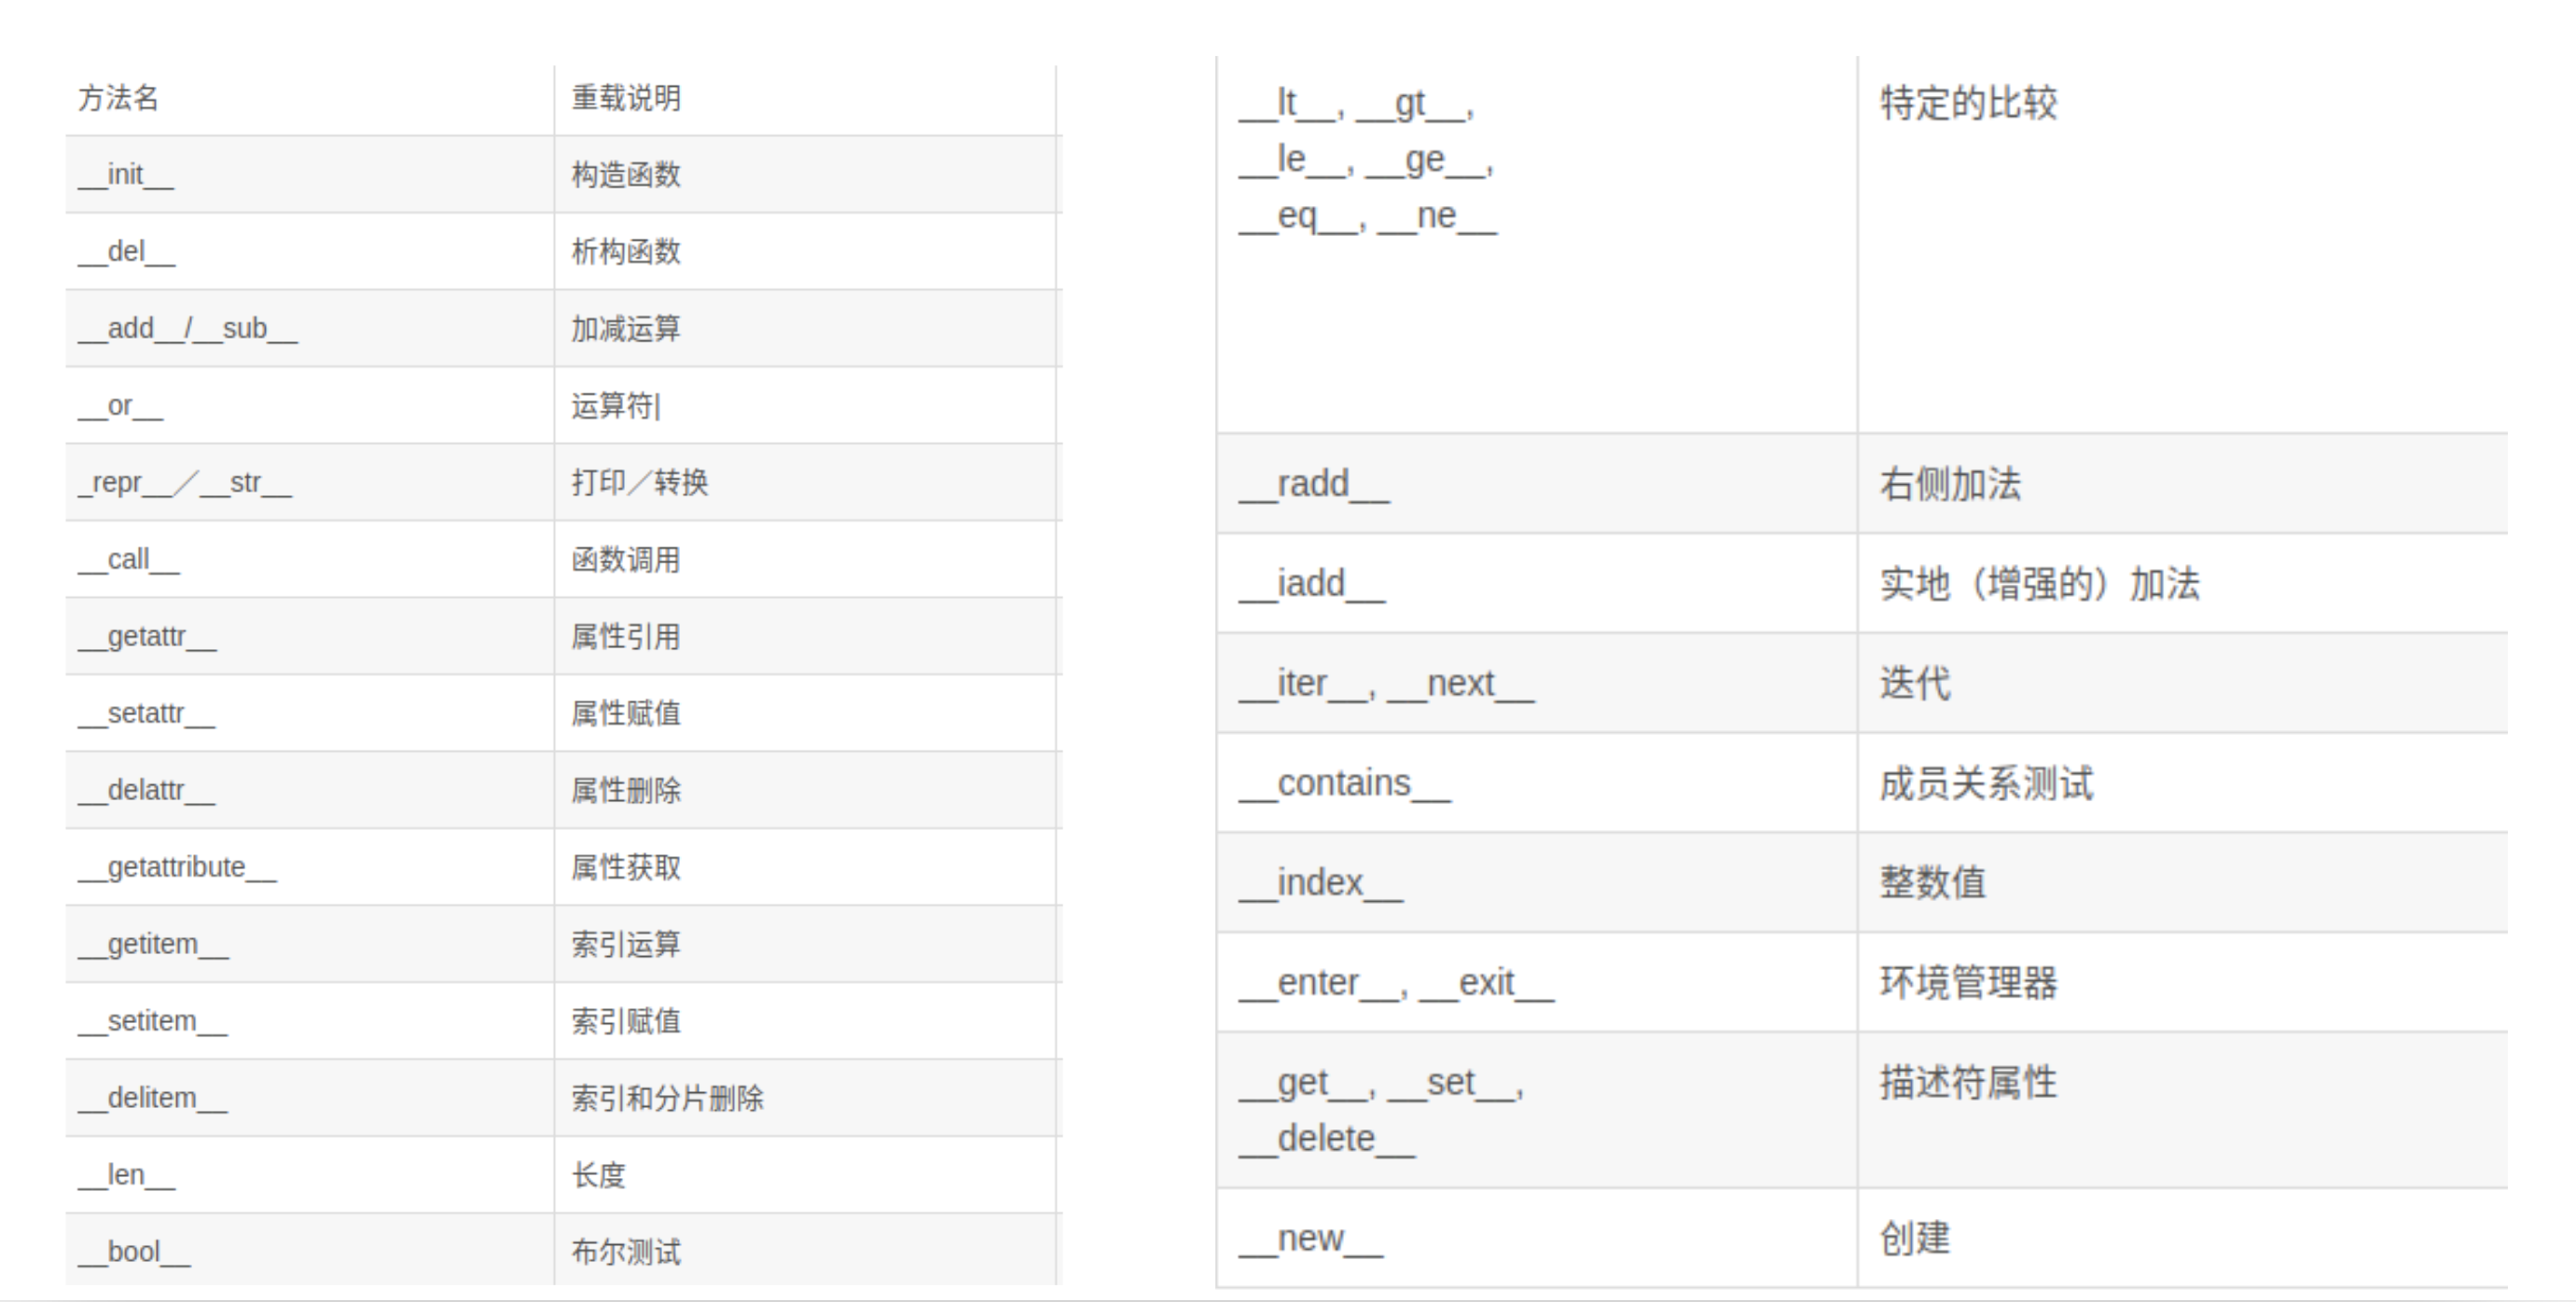